In [2]:
import numpy as np
from dezero import Variable

In [3]:
x = Variable(np.array(5.0))
y = x ** 2
print(f'x : {x}, x.grad : {x.grad}')
print(f'y : {y}, y.grad : {y.grad}')
y.backward()

# y' = 2x
print(f'x : {x}, x.grad : {x.grad}')
print(f'y : {y}, y.grad : {y.grad}')

print()

# for i in np.arange(-5, 5.5, 0.5): 
#     x = Variable(np.array(i))
#     y = x ** 2
#     y.backward()

#     print(f'x : {x}, x.grad : {x.grad}')


x = Variable(np.array(5.0))
y = x ** 2
y.backward()

i = 0
for i in range(10000):
    # y = x ** 2
    # y.backward()

    # ニュートン法
    if abs(x.grad.data) > 0.000001:
        x.data -= y.data / x.grad.data
        y = x ** 2
        x.cleargrad()
        y.backward()
    else:
        break
    if i % 1000 == 0:
        print(x)

print(i, x)


x : variable(5.0), x.grad : None
y : variable(25.0), y.grad : None
x : variable(5.0), x.grad : variable(10.0)
y : variable(25.0), y.grad : None

variable(2.5)
24 variable(2.980232238769531e-07)


In [15]:
x = Variable(np.array(5.0))
y = Variable(np.array(7.0))


z = x ** 2 + y **3
print(f'x : {x}, x.grad : {x.grad}')
print(f'y : {y}, y.grad : {y.grad}')
z.backward()

# dz/dx = 2x    x = 5
# dz/dy = 3y^2  y = 7
print(f'x : {x}, x.grad : {x.grad}')
print(f'y : {y}, y.grad : {y.grad}')

x : variable(5.0), x.grad : None
y : variable(7.0), y.grad : None
x : variable(5.0), x.grad : variable(10.0)
y : variable(7.0), y.grad : variable(147.0)


In [16]:
def trace_back(variable):
    """Trace back from a variable to its creators."""
    # traced_vars = set()
    traced_vars = {}
    variables_to_check = [variable]

    while variables_to_check:
        current_var = variables_to_check.pop()

        # Check if the variable has a creator
        if hasattr(current_var, 'creator') and current_var.creator is not None:
            for input_var in current_var.creator.inputs:
                if input_var not in traced_vars:
                    # traced_vars.add(input_var)
                    traced_vars[input_var.name] = input_var
                    variables_to_check.append(input_var)
    return traced_vars

# Trace back from the loss variable
traced_variables = trace_back(z)

for key, value in traced_variables.items():
    print(key,value.shape)

None ()


In [20]:
z.creator

In [4]:
import numpy as np
from dezero import Variable
import dezero.functions as F

a = np.array([1,2,3])
b = np.array([4,5,6])
print(F.matmul(a,b)) # 1*4 + 2*5 + 3*6
a, b = Variable(a), Variable(b)
c = F.matmul(a,b)
print(c)

a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])
c = F.matmul(a,b)
print(c)

variable(32)
variable(32)
variable([[19 22]
          [43 50]])


In [5]:
import numpy as np
from dezero import Variable

def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

y = rosenbrock(x0, x1)
y.backward()

print(x0.grad, x1.grad)
print(x0.grad.data, x1.grad.data)

variable(-2.0) variable(400.0)
-2.0 400.0


In [41]:

lr = 0.001
iters = 10000

for i in range(iters):
    y = rosenbrock(x0, x1)

    x0.cleargrad()
    x1.cleargrad()
    y.backward()

    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

print(x0.data, x1.data)
print(y)


0.9983503422105644 0.9966967979707025
variable(2.72792132076766e-06)


# 線形回帰

In [7]:
x.dot(W)

variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
          0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
          0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
          0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
          0. 0. 0. 0.])

42.296340129442335
====
W = [[2.39573972]]
b = [4.9467725]


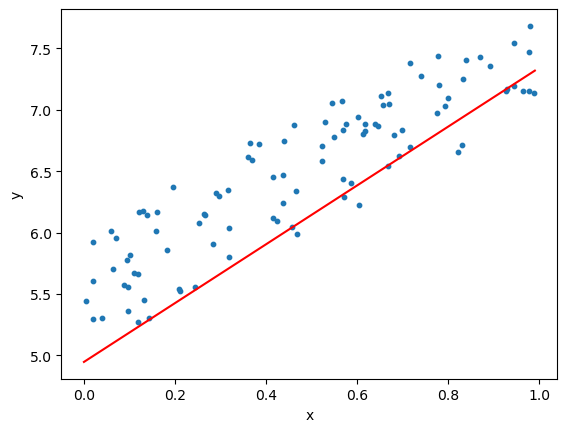

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

# トイ・データセット
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)  # 省略可能

x.name = f'input'
y.name = f'target'

W = Variable(np.zeros((1, 1)), name = "W")
# W = Variable(np.zeros(1))
b = Variable(np.zeros(1), name = "b")
# b = Variable(np.zeros(1))

def predict(x):
    y = F.matmul(x, W) + b
    return y

def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

lr = 0.1
iters = 10

for i in range(iters):
    y_pred = predict(x)
    
    y_pred.name = f'output_{i}'
    
    loss = mean_squared_error(y, y_pred)


    W.cleargrad()
    b.cleargrad()
    loss.backward()
    loss.name = 'loss'

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    if i % 10 == 0:
        print(loss.data)

print('====')
print('W =', W.data)
print('b =', b.data)

# Plot
plt.scatter(x.data, y.data, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

In [47]:
W = Variable(np.zeros((1, 1)), name = "W")
print(W)
W = Variable(np.zeros(1))
print(W)

variable([[0.]])
variable([0.])


In [166]:
def trace_back(variable):
    """Trace back from a variable to its creators."""
    # traced_vars = set()
    traced_vars = {}
    variables_to_check = [variable]

    while variables_to_check:
        current_var = variables_to_check.pop()

        # Check if the variable has a creator
        if hasattr(current_var, 'creator') and current_var.creator is not None:
            for input_var in current_var.creator.inputs:
                if input_var not in traced_vars:
                    # traced_vars.add(input_var)
                    traced_vars[input_var.name] = input_var
                    variables_to_check.append(input_var)
    return traced_vars

# Trace back from the loss variable
traced_variables = trace_back(loss)

for key, value in traced_variables.items():
    print(key,value.shape)

None (100, 1)
target (100, 1)
output_0 (100, 1)
b (1,)
input (100, 1)
W (1, 1)


In [155]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

# トイ・データセット
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)  # 省略可能

W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

def predict(x):
    y = F.matmul(x, W) + b
    return y

def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

# print(F.matmul(x, W).shape) # 100, 1
# print(b.shape) # 1
# print(predict(x).shape, predict(x)) # 100, 1

In [79]:
y_pred = predict(x)
loss = mean_squared_error(y, y_pred)
print(loss)

variable(42.296340129442335)


In [80]:
print(W.grad)
print(W.cleargrad)
print(b.cleargrad)
print(loss.cleargrad)
print(loss.backward())
print(W.grad)
print(b.grad)

None
<bound method Variable.cleargrad of variable([[0.]])>
<bound method Variable.cleargrad of variable([0.])>
<bound method Variable.cleargrad of variable(42.296340129442335)>
None
variable([[-6.44334584]])
variable([-12.94733887])


In [15]:
y_pred = predict(x)
loss = mean_squared_error(y, y_pred)
print(loss)

W.cleargrad()
b.cleargrad()
loss.backward()

print(W.grad.data)
print(b.grad.data)


variable(42.296340129442335)
[[-6.44334584]]
[-12.94733887]


42.296340129442335
0.24915731977561134
0.10078974954301652
0.09461859803040694
0.0902667138137311
0.08694585483964615
0.08441084206493275
0.08247571022229121
0.08099850454041051
0.07987086218625004
====
W = [[2.11807369]]
b = [5.46608905]


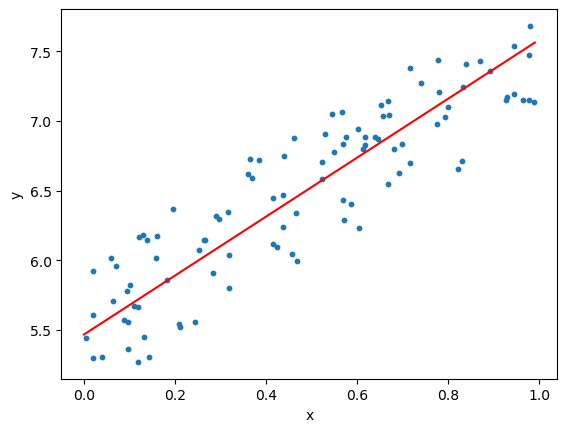

In [81]:

lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    if i % 10 == 0:
        print(loss.data)

print('====')
print('W =', W.data)
print('b =', b.data)

# Plot
plt.scatter(x.data, y.data, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

# ニューラルネットワーク

In [20]:
np.random.randn(I, H)

array([[-1.10438334,  0.05216508, -0.739563  ,  1.5430146 , -1.29285691,
         0.26705087, -0.03928282, -1.1680935 ,  0.52327666, -0.17154633]])

0.8473695850105871
0.2514286285183607
0.2475948546674987
0.23786120447054812
0.21222231333102934
0.16742181117834157
0.09681932619992645
0.0784952829060233
0.07749729552991157
0.07722132399559316
0.07698661032692945
0.07677496339867403
0.07658271141330995
0.0764071922881222
0.07624632377852587
0.07609843292673374
0.11208035255376035
0.0759981587301131
0.17770026962757007
0.07588228249948187


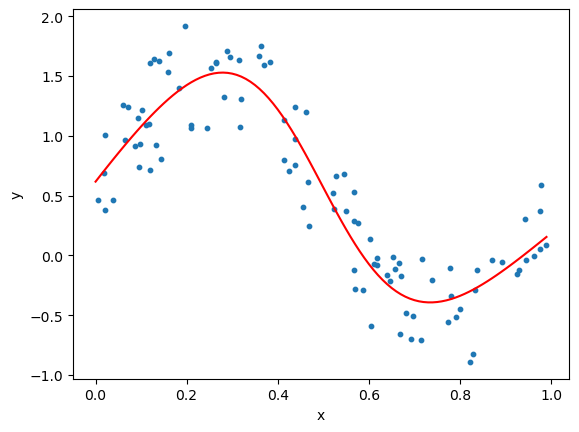

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Model
from dezero import optimizers
from dezero import Variable
import dezero.layers as L
import dezero.functions as F

# Dataset
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

I, H, O = 1,10,1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

lr = 0.2
iters = 20000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()

    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    
    if i % 1000 == 0:
        print(loss.data)


# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()


In [30]:
print(f'W1 :{W1}')
print(f'b1 :{b1}')
print(f'W2 :{W2}')
print(f'b2 :{b2}')

W1 :variable([[-1.92310858 -1.74651425 -9.69055807 -0.94601886 -0.3374755  -1.85279905
           -1.65801259 -1.77645875 -1.54233905 -1.67934998]])
b1 :variable([0.31435784 0.20743258 4.75117716 0.33121333 1.11797703 0.25720521
          0.19367637 0.21209369 0.1892225  0.19620804])
W2 :variable([[-2.01059814]
          [-1.65555842]
          [ 4.99455725]
          [-0.41697407]
          [ 0.43069345]
          [-1.87289254]
          [-1.4881957 ]
          [-1.71742407]
          [-1.28199545]
          [-1.52762165]])
b2 :variable([2.03498212])


やってる中身としては↑の通り  
ただし，ごちゃごちゃしているので
# dezeroのモデルを利用

In [2]:
import numpy as np
import dezero.layers as L

# Linear()の中は出力の個数
linear = L.Linear(out_size=10, in_size=5)

for param in linear.params():
    print(param.name)

batch_size, input_size = 100, 5
x = np.random.randn(batch_size, input_size)
# x.shape = (100, 5)

# (100, 5) * w(5, 10) + b = (100, 10)
# y = linear(x)で順伝播の計算の歴史が保持される
y = linear(x)

print('y shape:', y.shape)
print('params shape:', linear.W.shape, linear.b.shape)

for param in linear.params():
    print(param.name, param.shape)

b
W
y shape: (100, 10)
params shape: (5, 10) (10,)
b (10,)
W (5, 10)


In [3]:
# random.randnの仕様がよくわからなかったため確認
# random.randn(a,b) shape(a,b)の配列を生成
# 平均0 標準偏差1 の標準正規分布に沿って生成5

x = np.random.randn(100, 5)
# print(x.shape,"\n", x[:7])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Model
from dezero import optimizers
import dezero.layers as L
import dezero.functions as F

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

model = TwoLayerNet(10, 1)

for param in model.params():
    print(param)

model.cleargrads()

variable([0.])
variable(None)
variable([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.])
variable(None)


0.8165178492839196
0.24990280802148895
0.24609876581126014
0.2372159081431807
0.20793216413350174
0.12311905720649356
0.07888166506355153
0.07655073683421637
0.07637803086238228
0.07618764131185567


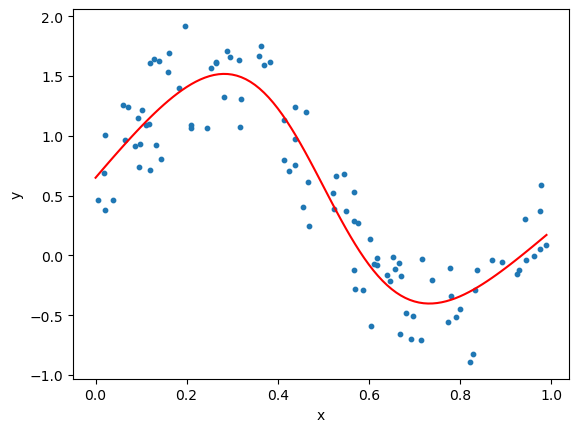

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Model
from dezero import optimizers
import modified_layers as L
import dezero.layers as L
import dezero.functions as F
from dezero.core import Parameter

# Dataset
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
iters = 10000

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        # self.l1.W = Parameter(None, name='W1')
        # self.l1.b = Parameter(np.zeros(self.l1.out_size, dtype=self.l1.dtype), name='b1')

        self.l2 = L.Linear(out_size)
        # self.l2.W = Parameter(None, name='W2')
        # self.l2.b = Parameter(np.zeros(self.l2.out_size, dtype=self.l2.dtype), name='b2')

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

model = TwoLayerNet(10, 1)
# optimizerを追加
optimizer = optimizers.SGD(lr)
optimizer.setup(model)

for i in range(iters):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    # for p in model.params():
    #     p.data-= le * p.grad.data
    optimizer.update()


    if i % 1000 == 0:
        print(loss.data)

# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = model(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

In [6]:
for param in model.params():
    print(param.name, param.shape, "\n", param)

b (1,) 
 variable([-0.91091275])
W (10, 1) 
 variable([[ 1.0825084 ]
          [-2.7484486 ]
          [ 5.4915586 ]
          [-1.3048114 ]
          [-1.197905  ]
          [ 0.32324767]
          [ 1.4315618 ]
          [-0.86709327]
          [-2.6347868 ]
          [ 1.2583766 ]])
b (10,) 
 variable([-0.9606268   0.49943432  4.5593724   0.16067517  0.20714144 -1.874649
          -0.5832339  -0.00763051  0.57859486 -0.5276554 ])
W (1, 10) 
 variable([[ 1.6524137  -2.1517513  -9.170103   -1.1727254  -1.1385859   3.307915
            1.617087   -0.63725543 -2.1345348   1.4791305 ]])


inputの数があやふやなので，それを明言して確かめる

0.8165178492839196
0.25390239816542953
0.25371625381807394
0.25362075925327027
0.2535657642467816
0.25353152711116955
0.25350898174549014
0.25349348986266795
0.2534824801105108
0.25347443871399705


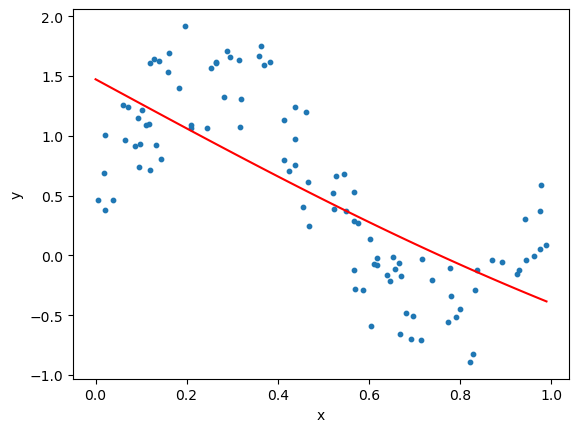

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Model
from dezero import optimizers
import modified_layers as L
import dezero.layers as L
import dezero.functions as F
from dezero.core import Parameter

# Dataset
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
iters = 10000

class TwoLayerNet(Model):
    def __init__(self, input_size, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size, input_size)
        # self.l1.W = Parameter(None, name='W1')
        # self.l1.b = Parameter(np.zeros(self.l1.out_size, dtype=self.l1.dtype), name='b1')

        self.l2 = L.Linear(out_size, hidden_size)
        # self.l2.W = Parameter(None, name='W2')
        # self.l2.b = Parameter(np.zeros(self.l2.out_size, dtype=self.l2.dtype), name='b2')

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

model = TwoLayerNet(1, 10, 1)
# optimizerを追加
optimizer = optimizers.SGD(lr)
optimizer.setup(model)

for i in range(iters):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    # for p in model.params()
    #     p.data-= le * p.grad.data
    optimizer.update()


    if i % 1000 == 0:
        print(loss.data)

# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = model(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

# Q学習とニューラルネットワーク

In [11]:
# one-hotエンコーディングをする関数

import numpy as np

def one_hot(state):
    HEIGHT, WIDTH = 3, 4
    vec = np.zeros(HEIGHT * WIDTH, dtype = np.float32)
    y, x = state
    idx = WIDTH * y + x
    vec[idx] = 1.0
    return vec[np.newaxis, :]


state = [2, 0]
x = one_hot(state) 

print(x.shape)
print(x)
print(x.reshape(3,4))

(1, 12)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [12]:
from collections import defaultdict

Q = defaultdict(lambda: 0)
state = (2,0)
action = 0

print(Q[state, action])
print(Q)

0
defaultdict(<function <lambda> at 0x0000029BD7B20EE0>, {((2, 0), 0): 0})


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Model
from dezero import optimizers
import dezero.layers as L
import dezero.functions as F
from dezero.core import Parameter

class QNet(Model):
    def __init__(self):
        super().__init__()
        self.l1 = L.Linear(100)
        self.l1.W = Parameter(None, name='W1')
        self.l1.b = Parameter(np.zeros(self.l1.out_size, dtype=self.l1.dtype), name='b1')

        self.l2 = L.Linear(4)
        self.l2.W = Parameter(None, name='W2')
        self.l2.b = Parameter(np.zeros(self.l2.out_size, dtype=self.l2.dtype), name='b2')

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

qnet = QNet()

state = (2, 0)
state = one_hot(state)

qs = qnet(state)
print(state, state.shape)
print(qs.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]] (1, 12)
(1, 4)


In [14]:
for param in qnet.params():
    print(param.name, param.shape) #, "\n", param)

b2 (4,)
W2 (100, 4)
b1 (100,)
W1 (12, 100)


## 7.4.3 ニューラルネットワークとQ学習

In [39]:
# import os, sys; sys.path.append(os.path.join(os.path.dirname(__file__), '..'))  # for importing the parent dirs
import os, sys; sys.path.append(os.path.join(os.getcwd(), '..'))
# print(sys.path)
import matplotlib.pyplot as plt
import numpy as np
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L
from dezero.core import Parameter

from common.gridworld import GridWorld

mode = 1

class QNet(Model):
    def __init__(self):
        super().__init__()

        if mode == 1:
            self.l1 = L.Linear(100)
            self.l1.W = Parameter(None, name='W1')
            self.l1.b = Parameter(np.zeros(self.l1.out_size, dtype=self.l1.dtype), name='b1')
            
            self.l2 = L.Linear(4)
            self.l2.W = Parameter(None, name='W2')
            self.l2.b = Parameter(np.zeros(self.l2.out_size, dtype=self.l2.dtype), name='b2')
        if mode == 2:
            self.l1 = L.Linear(100)
            self.l1.W = Parameter(None, name='W1')
            self.l1.b = Parameter(np.zeros(self.l1.out_size, dtype=self.l1.dtype), name='b1')

            self.l2 = L.Linear(40)
            self.l2.W = Parameter(None, name='W2')
            self.l2.b = Parameter(np.zeros(self.l2.out_size, dtype=self.l2.dtype), name='b2')
            
            self.l3 = L.Linear(4)
            self.l3.W = Parameter(None, name='W3')
            self.l3.b = Parameter(np.zeros(self.l3.out_size, dtype=self.l3.dtype), name='b3')
        

    def forward(self, x):
        if mode == 1:
            y = F.sigmoid(self.l1(x))
            y = self.l2(y)

        if mode == 2:
            y = F.sigmoid(self.l1(x))
            y = F.sigmoid(self.l2(x))
            y = self.l3(y)
        
        return y


class QLearningAgent:
    def __init__(self):
        self.gamma = 0.9
        self.lr = 0.01
        self.epsilon = 0.1
        self.action_size = 4

        self.qnet = QNet()
        self.optimizer = optimizers.SGD(self.lr)
        self.optimizer.setup(self.qnet)

    def get_action(self, state_vec):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_size)
        else:
            qs = self.qnet(state_vec)
            return qs.data.argmax()

    def update(self, state, action, reward, next_state, done):
        if done:
            next_q = np.zeros(1)  # [0.]
        else:
            next_qs = self.qnet(next_state)
            next_q = next_qs.max(axis=1)
            next_q.unchain()

        target = self.gamma * next_q + reward
        qs = self.qnet(state)
        q = qs[:, action]
        loss = F.mean_squared_error(target, q)

        self.qnet.cleargrads()
        loss.backward()
        self.optimizer.update()

        return loss.data

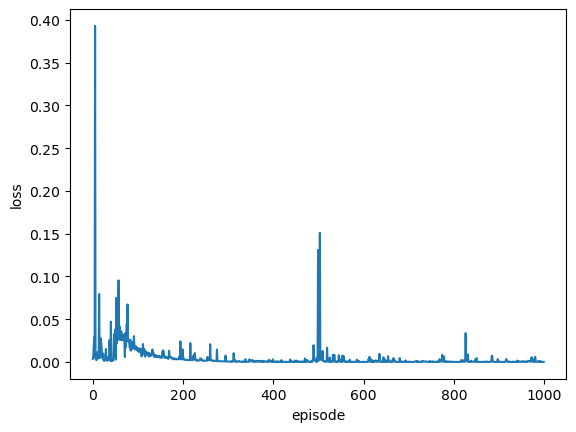

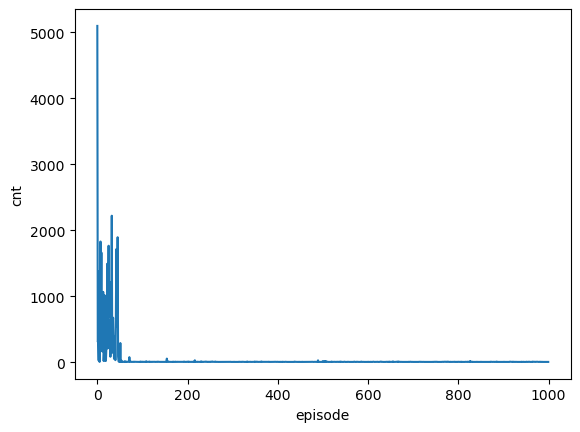

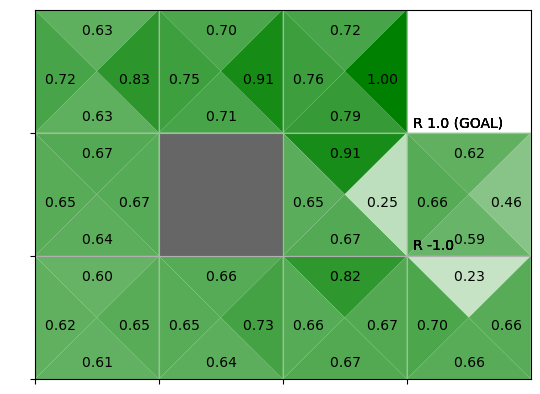

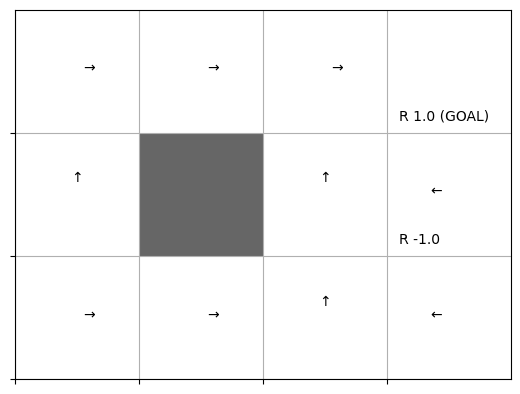

In [40]:
env = GridWorld()
agent = QLearningAgent()

episodes = 1000
loss_history = []
cnt_history = []

for episode in range(episodes):
    state = env.reset()
    state = one_hot(state)
    total_loss, cnt = 0, 0
    done = False

    while not done:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        next_state = one_hot(next_state)

        loss = agent.update(state, action, reward, next_state, done)
        total_loss += loss
        cnt += 1
        state = next_state

    average_loss = total_loss / cnt
    
    
    # if episode % 100 == 0 or episode < 50:
    #     print(cnt)
    cnt_history.append(cnt)

    loss_history.append(average_loss)


plt.xlabel('episode')
plt.ylabel('loss')
plt.plot(range(len(loss_history)), loss_history)
plt.show()

plt.xlabel('episode')
plt.ylabel('cnt')
plt.plot(range(len(cnt_history)), cnt_history)
plt.show()

# visualize
Q = {}
for state in env.states():
    for action in env.action_space:
        q = agent.qnet(one_hot(state))[:, action]
        Q[state, action] = float(q.data)
env.render_q(Q)